# Combine Tables

In [1]:
setwd("/home/jp/ICP_Responders/DataCollectionFormatting/MergeTables")
set.seed(64)

In [2]:
library(plyr)
library(dplyr)
library(scales)
library(caret)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: ggplot2



## Fetching Data

In [3]:
prat <- read.csv("Prat.csv")
prat <- prat[prat$Type %in% c("MELANOMA"), ]  # The database from Prat et al., Cancer Res 2017 has data for multiple cancer types,
                                              #picking only the melanoma samples
gide_pn <- read.csv("Gide_pn.csv")
gide_pni <- read.csv("Gide_pni.csv")
hugo <- read.csv("Hugo.csv")
lauss <- read.csv("Lauss.csv")
nathanson <- read.csv("Nathanson_pre.csv")
riaz_naive <- read.csv("Riaz_naive.csv")
riaz_prog <- read.csv("Riaz_prog.csv")

In [4]:
# liu <- read.csv("Liu.csv")
# amato <- read.csv("Amato.csv")

In [5]:
# Removing unnecessary X  from entrez ID as R adds it as a suffix to colnames with numeric characters
names(prat) <- sub("^X", "", names(prat))
names(gide_pni) <- sub("^X", "", names(gide_pni))
names(gide_pn) <- sub("^X", "", names(gide_pn))
names(hugo) <- sub("^X", "", names(hugo))
names(lauss) <- sub("^X", "", names(lauss))
names(nathanson) <- sub("^X", "", names(nathanson))
names(riaz_naive) <- sub("^X", "", names(riaz_naive))
names(riaz_prog) <- sub("^X", "", names(riaz_prog))
# names(liu) <- sub("^X", "", names(liu))
# names(amato) <- sub("^X", "", names(amato))

In [6]:
# table(prat$Response)
# table(liu$Response)
# table(amato$Response)

In [7]:
# liu[liu$Response == 'Y',"Response"] <- '1' 
# liu[liu$Response == 'N', "Response"] <- '0' 
# amato[amato$Response == 'Y',"Response"] <- '1' 
# amato[amato$Response == 'N', "Response"] <- '0'
# table(liu$Response)
# table(amato$Response)

## Finding common clinical data

In [8]:
gide_pn_cl <- gide_pn
gide_pni_cl <- gide_pni
hugo_cl <- hugo
prat_cl <- prat
nathanson_cl <- nathanson
lauss_cl <- lauss
riaz_naive_cl <- riaz_naive
riaz_prog_cl <- riaz_prog

prat_cl$OS <- NA
prat_cl$OS.Event <- NA
lauss_cl$Gender <- NA
lauss_cl$Age <- NA
nathanson_cl$Age <- NA

In [9]:
final_table_clinical <- Reduce(function(x,y) rbind(x, y), 
                               list(prat_cl[,c("Patient", "Response", "Age", "Gender", "OS", "OS.Event")],
                                    gide_pn_cl[,c("Patient", "Response", "Age", "Gender", "OS", "OS.Event")],
                                    gide_pni_cl[,c("Patient", "Response", "Age", "Gender", "OS", "OS.Event")],
                                    hugo_cl[,c("Patient", "Response", "Age", "Gender", "OS", "OS.Event")],
                                    lauss_cl[,c("Patient", "Response", "Age", "Gender", "OS", "OS.Event")],
                                    nathanson_cl[,c("Patient", "Response", "Age", "Gender", "OS", "OS.Event")],
                                    riaz_naive_cl[,c("Patient", "Response", "Age", "Gender", "OS", "OS.Event")],
                                    riaz_prog_cl[,c("Patient", "Response", "Age", "Gender", "OS", "OS.Event")]
                                    )                               
                               )

Warning message in `[<-.factor`(`*tmp*`, ri, value = c(1L, 10L, 11L, 12L, 13L, 14L, :
“invalid factor level, NA generated”
Warning message in `[<-.factor`(`*tmp*`, ri, value = c(1L, 10L, 11L, 12L, 13L, 14L, :
“invalid factor level, NA generated”


In [10]:
# final_table_clinical <- final_table_clinical[,c(1:5,9)]
colnames(final_table_clinical)
dim(final_table_clinical)
head(final_table_clinical)

[1] "Patient"  "Response" "Age"      "Gender"   "OS"       "OS.Event"

[1] 255   6

,Patient,Response,Age,Gender,OS,OS.Event
,<fct>,<int>,<int>,<int>,<dbl>,<int>
36,A41,0,68,1,NA,NA
37,A42,0,59,0,NA,NA
38,A43,0,70,0,NA,NA
39,A44,1,83,1,NA,NA
40,A45,0,80,0,NA,NA
41,A46,0,50,0,NA,NA


## Finding common column names for gene expression 


### Combining Gide Hugo and Riaz for only antiPD1 subset

In [11]:
common_col_names_pd1 <- Reduce(intersect, list(
                                           names(gide_pn),
                                           names(hugo),
                                           names(riaz_naive)))
   
gide_pn_sub_pd1 <- gide_pn[ , common_col_names_pd1]   
hugo_sub_pd1 <- hugo[ , common_col_names_pd1]  
riaz_naive_sub_pd1 <- riaz_naive[ , common_col_names_pd1]

gide_pn_sub_pd1$Source <- "GideAntiPD1"
hugo_sub_pd1$Source <- "HugoAntiPD1"
riaz_naive_sub_pd1$Source <- "RiazAntiPD1"


GideHugoRiaz_AntiPD1 <- rbind.fill(gide_pn_sub_pd1, riaz_naive_sub_pd1, hugo_sub_pd1)
tail(GideHugoRiaz_AntiPD1)

,Patient,OS,OS.Event,RECIST,Age,Gender,Response,1,503538,2,⋯,11130,7789,158586,79364,440590,79699,7791,23140,26009,Source
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
112,33,948,0,2,62,0,1,-0.7833306,-0.6597064,-0.7759955,⋯,0.3015565,0.37129982,0.65865263,0.4754212531,-0.1079779,-0.19467443,-0.4841232,0.09142772,-0.2572165,HugoAntiPD1
113,34,439,0,2,61,0,1,-0.5220148,-0.4101245,-1.9293667,⋯,-0.2722298,0.68195559,0.59120037,0.0401802681,-0.1079779,0.28265030,-0.8213559,0.16032684,0.2758305,HugoAntiPD1
114,35,882,0,2,51,0,1,-2.0794612,-0.9330296,-0.1050618,⋯,-0.3806193,1.01241721,1.05815079,-0.2478063241,-0.1079779,0.21264861,-0.1724343,0.46213762,0.1787050,HugoAntiPD1
115,36,662,1,0,55,1,0,0.9777502,2.0752102,-1.8386027,⋯,0.4281716,0.17556634,0.22986163,0.5853512690,1.6215684,0.01269825,-1.6447199,-0.12955425,-0.1459081,HugoAntiPD1
116,37,NA,0,3,69,0,1,0.1422566,1.0040918,-0.4162588,⋯,-0.7203642,-0.22943061,-0.31717571,-0.0008530272,-0.1079779,-0.25217658,1.0806782,0.25329600,0.1742025,HugoAntiPD1
117,38,1054,0,3,68,0,1,-0.3213073,0.3998782,0.7447451,⋯,-0.1268119,-0.04251633,-0.06833032,-0.2357740636,-0.1035445,-0.22646638,-0.1034729,0.07672816,-0.3479512,HugoAntiPD1


### Combining Gide Hugo Riaz Amato and Liu for only antiPD1 subset

In [12]:
# common_col_names_pd1 <- Reduce(intersect, list(
#                                            names(gide_pn),
#                                            names(hugo),
#                                            names(riaz_naive),
#                                            names(liu),
#                                            names(amato)))
   
# gide_pn_sub_pd1 <- gide_pn[ , common_col_names_pd1]   
# hugo_sub_pd1 <- hugo[ , common_col_names_pd1]  
# riaz_naive_sub_pd1 <- riaz_naive[ , common_col_names_pd1]
# liu_sub_pd1 <- liu[ , common_col_names_pd1]
# amato_sub_pd1 <- amato[ , common_col_names_pd1]


# gide_pn_sub_pd1$Source <- "GideAntiPD1"
# hugo_sub_pd1$Source <- "HugoAntiPD1"
# riaz_naive_sub_pd1$Source <- "RiazAntiPD1"
# liu_sub_pd1$Source <- "LiuAntiPD1"
# amato_sub_pd1$Source <- "AmatoAntiPD1"


# GideHugoRiazAmatoLiu_AntiPD1 <- rbind.fill(gide_pn_sub_pd1, riaz_naive_sub_pd1, hugo_sub_pd1, 
#                                            liu_sub_pd1, amato_sub_pd1)
# tail(GideHugoRiazAmatoLiu_AntiPD1)

In [13]:
# GideHugoRiazAmatoLiu_AntiPD1

### Combining Gide and Riaz for AntiPD1+AntiCTLA4 subset

In [14]:
common_col_names_comb <- Reduce(intersect, list(names(gide_pni), 
                                                   names(riaz_prog)))
   
gide_pni_sub_comb <- gide_pni[ , common_col_names_comb]   
riaz_prog_sub_comb <- riaz_prog[ , common_col_names_comb]

gide_pni_sub_comb$Source <- "GideAntiPD1CTLA4"
riaz_prog_sub_comb$Source <- "RiazAntiPD1CTLA4"


GideRiaz_AntiPD1CTLA4 <- rbind.fill(gide_pni_sub_comb, riaz_prog_sub_comb)
tail(GideRiaz_AntiPD1CTLA4)

,Patient,OS,OS.Event,PFS,PFS.Event,RECIST,Age,Gender,Response,1,⋯,11130,7789,158586,79364,440590,79699,7791,23140,26009,Source
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
72,21,218,1,171,1,1,64,0,0,-0.07458406,⋯,-0.30180062,-0.03554563,-0.03300157,0.03351858,-0.36142970,-0.09953613,-1.18343671,0.3089397,0.4906738,RiazAntiPD1CTLA4
73,22,429,1,220,1,1,60,1,0,2.40274450,⋯,-0.00842848,-0.19919688,-0.35593296,-0.24585554,-0.04326370,0.07744855,-0.94965188,-0.2083171,1.1695400,RiazAntiPD1CTLA4
74,23,904,0,49,1,0,66,0,0,1.27953553,⋯,0.03309851,0.64085211,0.40966044,0.32415920,-0.21634989,1.28154369,-0.51418449,-0.1630361,0.9130788,RiazAntiPD1CTLA4
75,24,174,1,44,1,0,60,1,0,0.41639163,⋯,-0.27150517,-0.44383583,-0.49491951,0.04905541,-0.07548377,-0.54657803,0.14637268,-0.4982916,0.5392522,RiazAntiPD1CTLA4
76,25,333,1,190,1,1,58,0,0,-1.24014173,⋯,0.42563603,-0.26854592,-0.12228193,-0.03507609,-0.14779021,-0.50462031,0.08776739,-0.2208459,-0.3044388,RiazAntiPD1CTLA4
77,26,747,1,408,1,1,74,0,0,0.15884106,⋯,-0.61698720,0.26366680,0.22348240,-0.02635386,-0.11123437,-0.88390370,-0.36069623,0.2581436,-0.1434963,RiazAntiPD1CTLA4


### Combining all datasets

In [15]:
common_col_names <- Reduce(intersect, list(names(prat),
                                           names(gide_pn),
                                           names(gide_pni),
                                           names(hugo),
                                           names(lauss), 
                                           names(nathanson),
                                           names(riaz_naive), 
                                           names(riaz_prog)
#                                            names(liu),
#                                            names(amato)
                                          ))

prat_sub <- prat[ , common_col_names]   
gide_pni_sub <- gide_pni[ , common_col_names]   
gide_pn_sub <- gide_pn[ , common_col_names]  
hugo_sub <- hugo[ , common_col_names]  
lauss_sub <- lauss[ , common_col_names]
nathanson_sub <- nathanson[ , common_col_names]
riaz_naive_sub <- riaz_naive[ , common_col_names]
riaz_prog_sub <- riaz_prog[ , common_col_names]
# liu_sub_pd1 <- liu[ , common_col_names_pd1]
# amato_sub_pd1 <- amato[ , common_col_names_pd1]

final_table_response_and_expression <- rbind.fill(prat_sub,gide_pn_sub,gide_pni_sub,hugo_sub,lauss_sub,
                                                  nathanson_sub,riaz_naive_sub, riaz_prog_sub)
tail(final_table_response_and_expression)

,Patient,Response,3920,345611,3929,54210,3716,10454,3557,3556,⋯,80380,80381,2002,353514,4940,84166,6236,80153,4851,4582
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
250,Pt79,0,1.00084295,-0.08410945,-0.8151114,-0.8809378,0.09149843,0.20453385,-1.4849841,0.2877233,⋯,-0.21858772,-1.3268485,0.04378626,-1.3572572,-1.0392013,0.4126503,-0.2980641,0.8097202,0.4158430,-0.6365383
251,Pt82,0,-0.23291868,0.15572320,1.9216673,-0.4435866,-0.73373452,-0.35362718,-0.5434037,-0.6147333,⋯,-0.00836145,-0.2967438,-0.55640634,-0.5932861,-1.6750865,-0.5852694,-0.1074941,-0.1635896,-0.3720574,-0.5057028
252,Pt85,0,0.85942880,-0.15020085,-1.0122270,0.8211893,-0.25756343,-0.01167449,0.3953208,2.3851941,⋯,-1.06841409,0.1162816,0.85260746,-0.8222788,-0.4949079,-0.4449492,-0.2980641,-0.8755626,-0.7496690,-0.2647822
253,Pt90,0,0.33766871,-0.10310139,-0.2166535,2.2832531,-0.55409585,-0.55146658,4.4701978,-0.6542684,⋯,0.38330421,0.3997010,-0.22059600,2.2725026,0.5470087,-0.3142405,0.3161637,-0.7258247,-0.3960919,0.5797279
254,Pt92,0,-0.07670529,-0.05276197,-1.0324625,-0.8334151,0.09497564,0.83299736,0.5185093,-0.8195689,⋯,0.77019116,0.1421818,-0.07986178,1.1948504,2.4069452,1.0292690,-0.2398134,-0.1469826,0.4518477,0.4970701
255,Pt98,0,-0.23680940,0.13284822,-0.8941238,-0.8772226,-1.03849917,0.32901564,-0.2184458,-0.5791981,⋯,-0.76589755,-0.4283180,-0.02139695,-0.4832295,-1.2544656,-0.9195794,-0.2623213,0.5461429,-0.1548215,-0.5183832



# Writing final csv

In [16]:
write.csv(final_table_response_and_expression, "Final_table_response_and_expression.csv", row.names = FALSE)
write.csv(final_table_clinical, "Final_table_clinical.csv", row.names = FALSE)
write.csv(GideHugoRiaz_AntiPD1, "GideHugoRiaz_AntiPD1.csv", row.names = FALSE)
# write.csv(GideHugoRiazAmatoLiu_AntiPD1, "GideHugoRiazAmatoLiu_AntiPD1.csv", row.names = FALSE)
write.csv(GideRiaz_AntiPD1CTLA4, "GideRiaz_AntiPD1CTLA4.csv", row.names = FALSE)

# Descriptive Statistics

## Gender Distribution

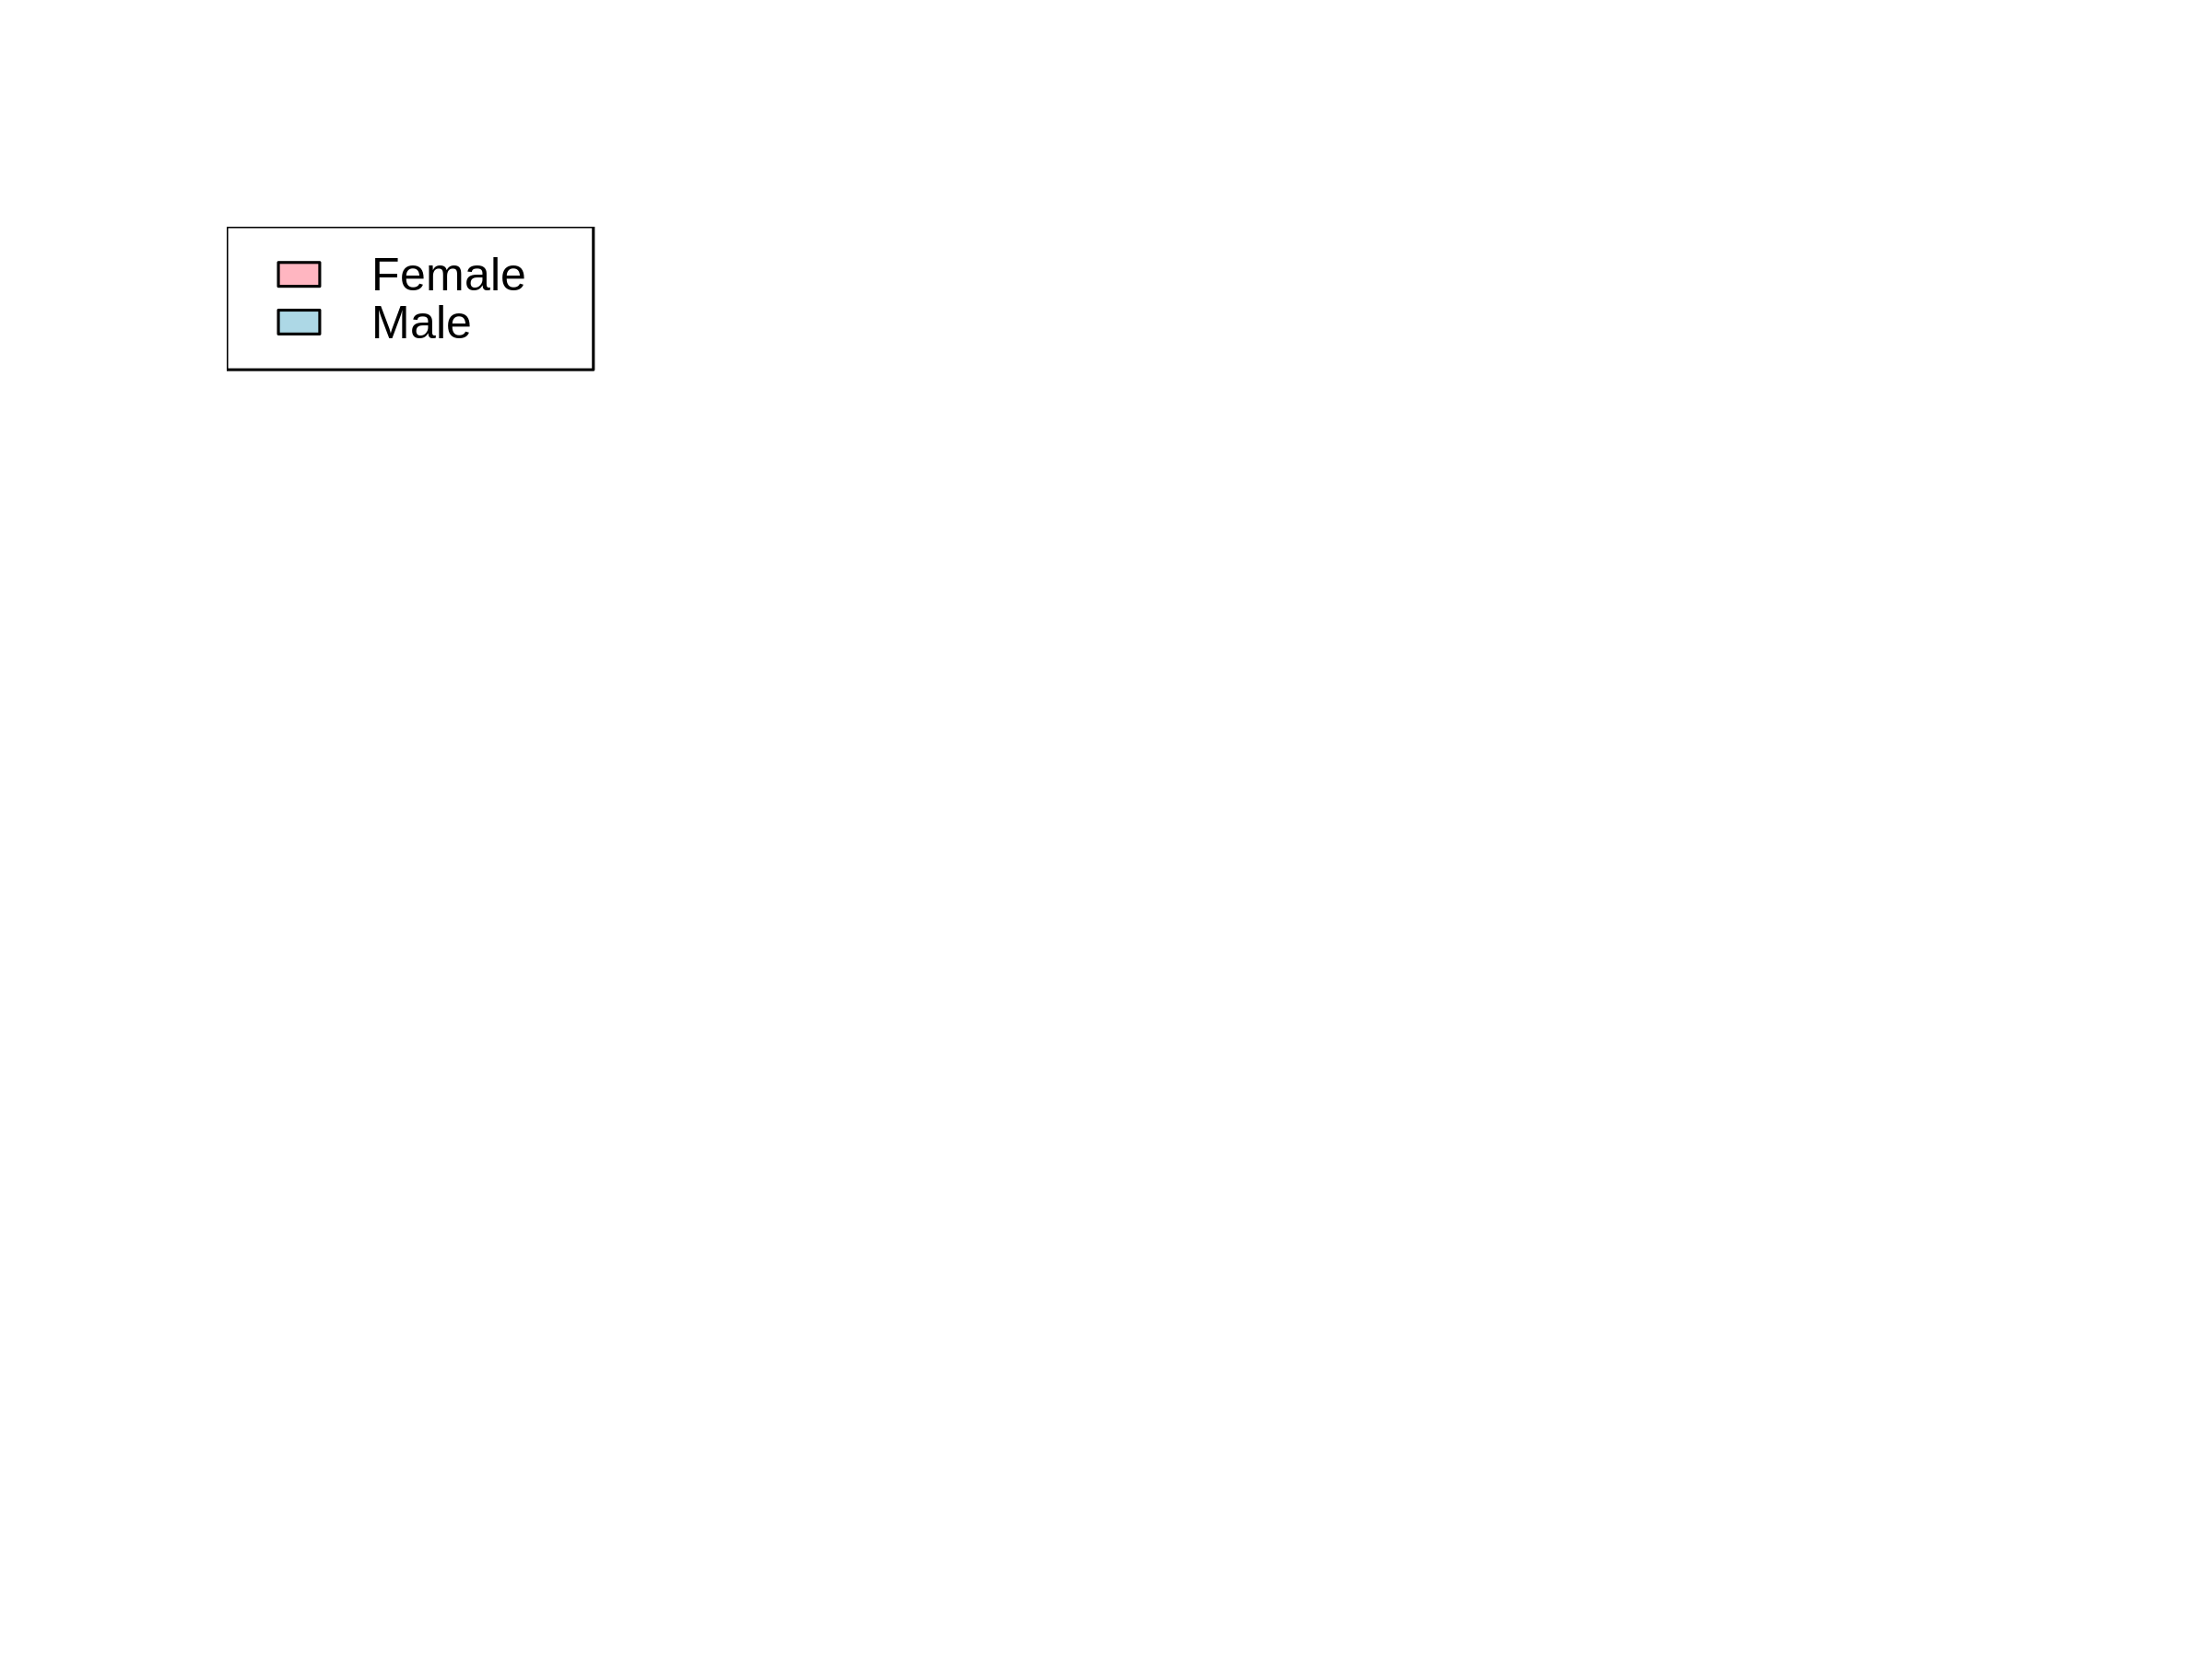

In [17]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 300)
plot(1,type="n",axes=F,xlab=NA,ylab=NA,xlim=c(1,100),ylim=c(1,100))
legend("topleft",
c("Female","Male"),
fill = c("lightpink","lightblue")
)
# options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 50)
# plot(1,type="n",axes=F,xlab=NA,ylab=NA,xlim=c(0,1),ylim=c(0,1))
# legend("topleft",
# c("Female","Male"),
# fill = c("lightpink","lightblue"),
# cex=5,xpd=NA)

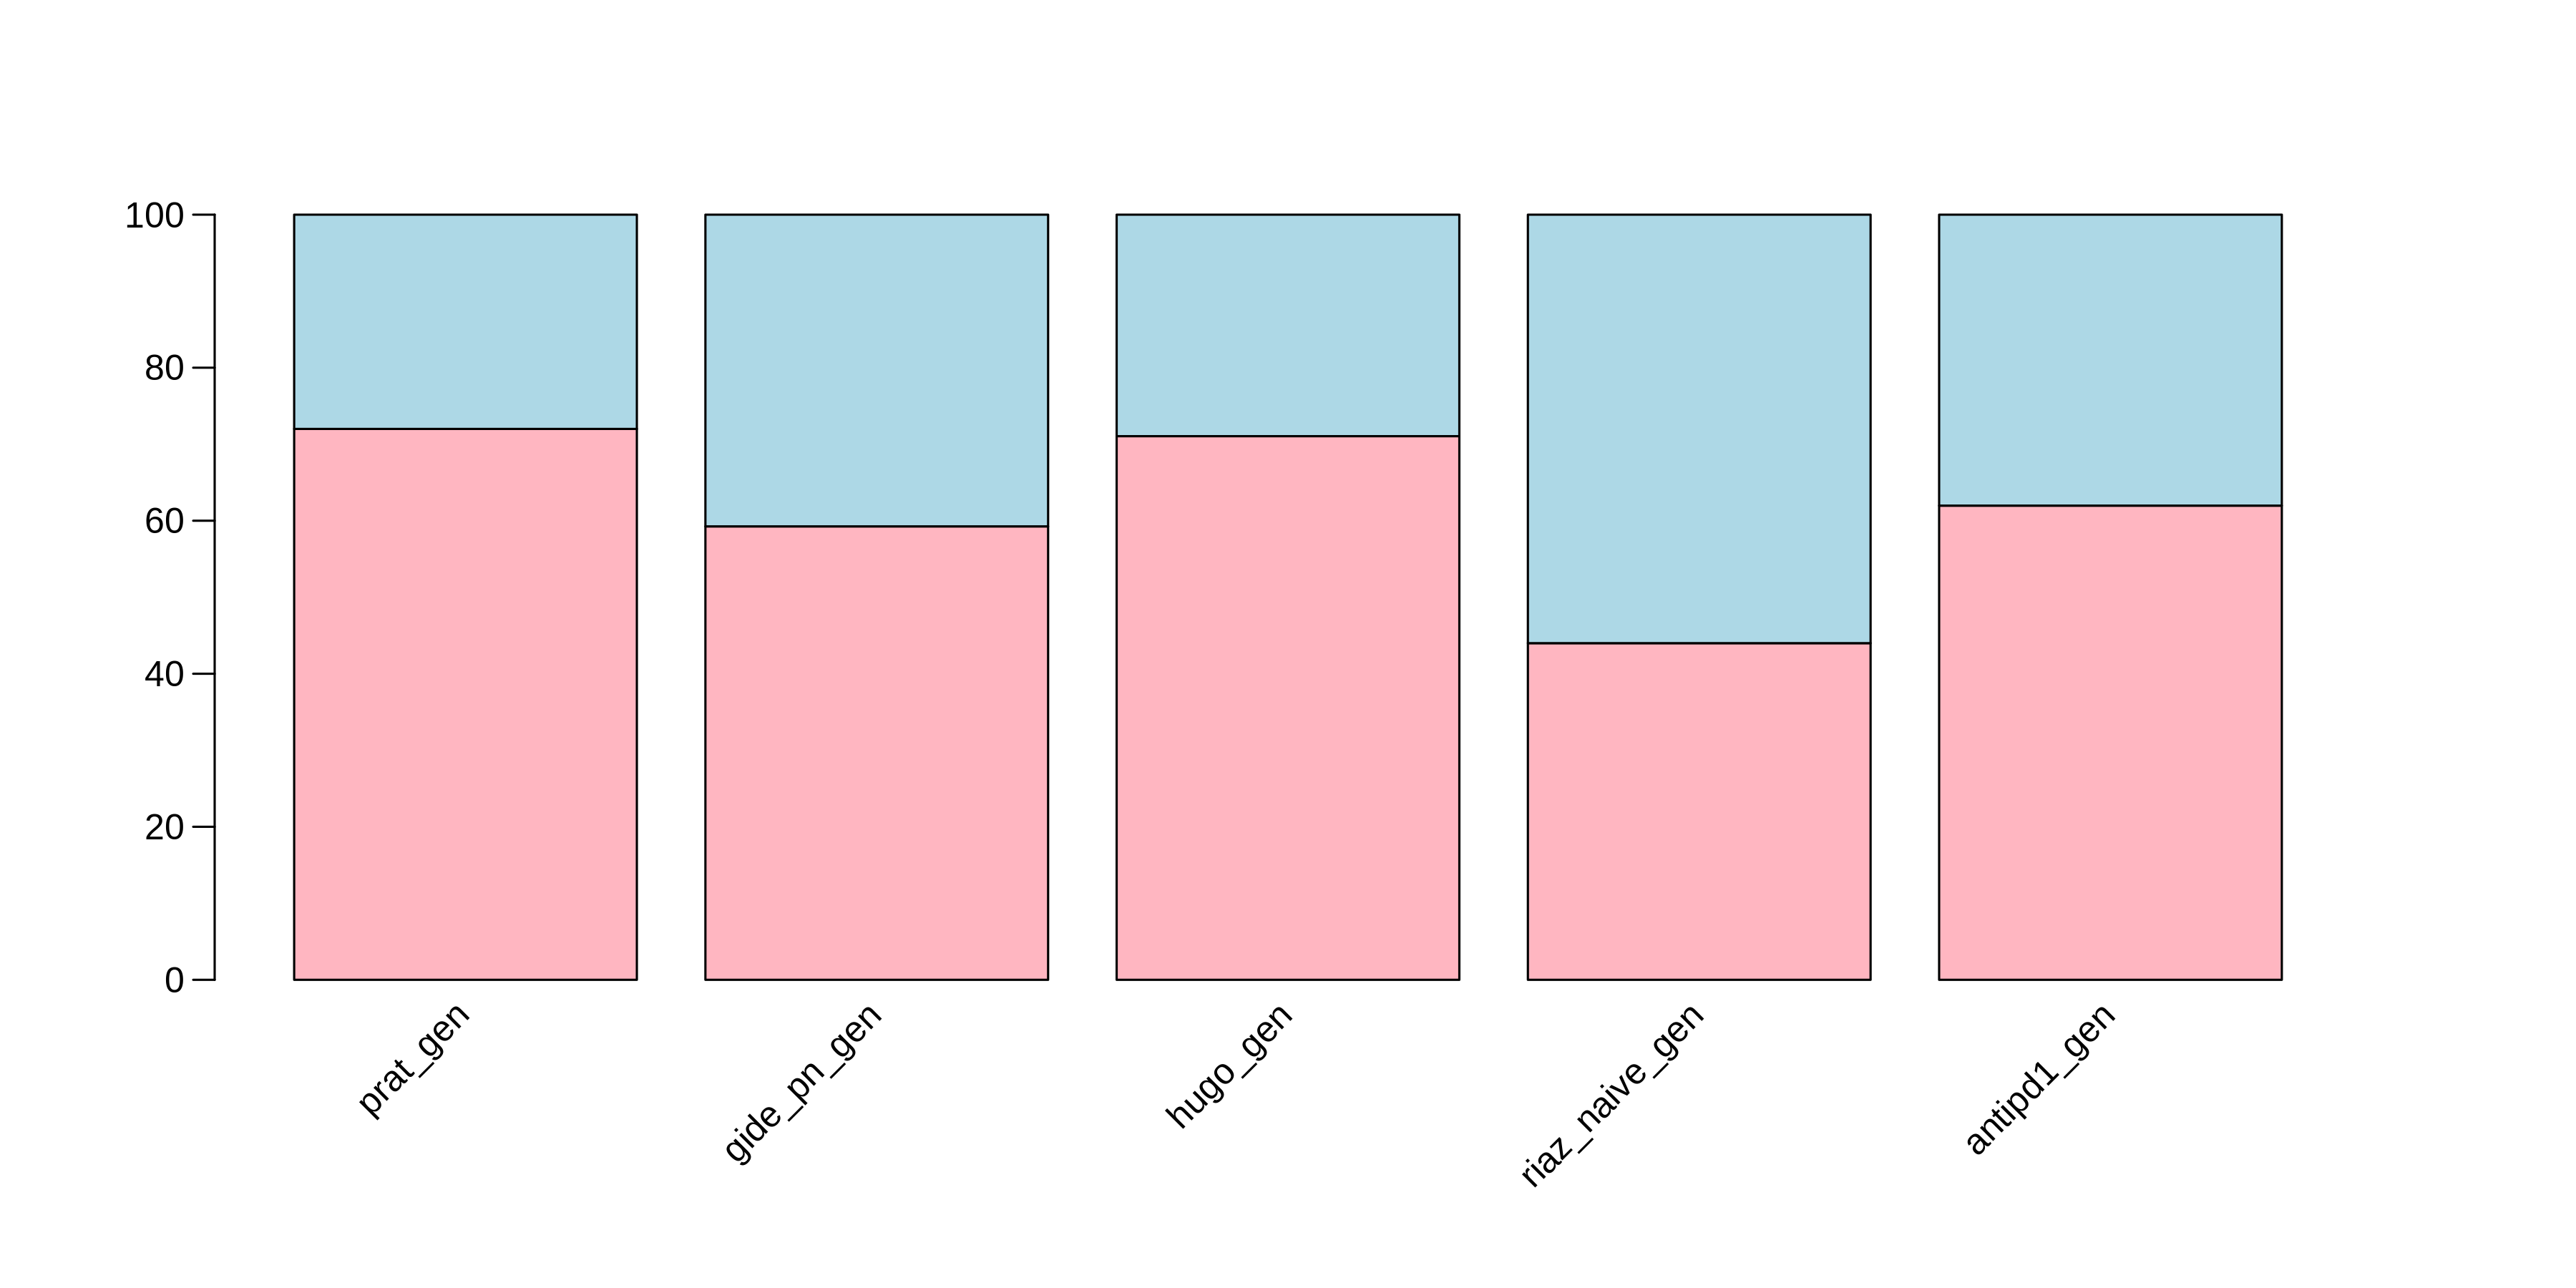

In [19]:
df_gen <- data.frame(prat_gen=as.numeric(prop.table(table(prat$Gender))),
                       gide_pn_gen=as.numeric(prop.table(table(gide_pn$Gender))),
#                        gide_pni_gen=as.numeric(prop.table(table(gide_pni$Gender))),
                       hugo_gen=as.numeric(prop.table(table(hugo$Gender))),
                       riaz_naive_gen=as.numeric(prop.table(table(riaz_naive$Gender))),
#                        riaz_prog_gen=as.numeric(prop.table(table(riaz_prog$Gender))),
                       antipd1_gen=as.numeric(prop.table(table(c(prat$Gender, gide_pn$Gender, hugo$Gender, riaz_naive$Gender))))
#                        antipd1_ctla4_gen=as.numeric(prop.table(table(c(gide_pni$Gender, riaz_prog$Gender))))
                      )*100
options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 300)
par(mar=c(7, 5, 5, 5), mgp=c(3, 0.7, 0))

x_gen <- barplot(as.matrix(df_gen),
             col=c("lightpink","lightblue"),
             las=2,
             names=rep("", ncol(df_gen))
            )
text(x_gen, rep(-4,ncol(df_gen)), colnames(df_gen), xpd=NA, srt=45, adj=1)

The data is dominated by female patients

## Age Distribution

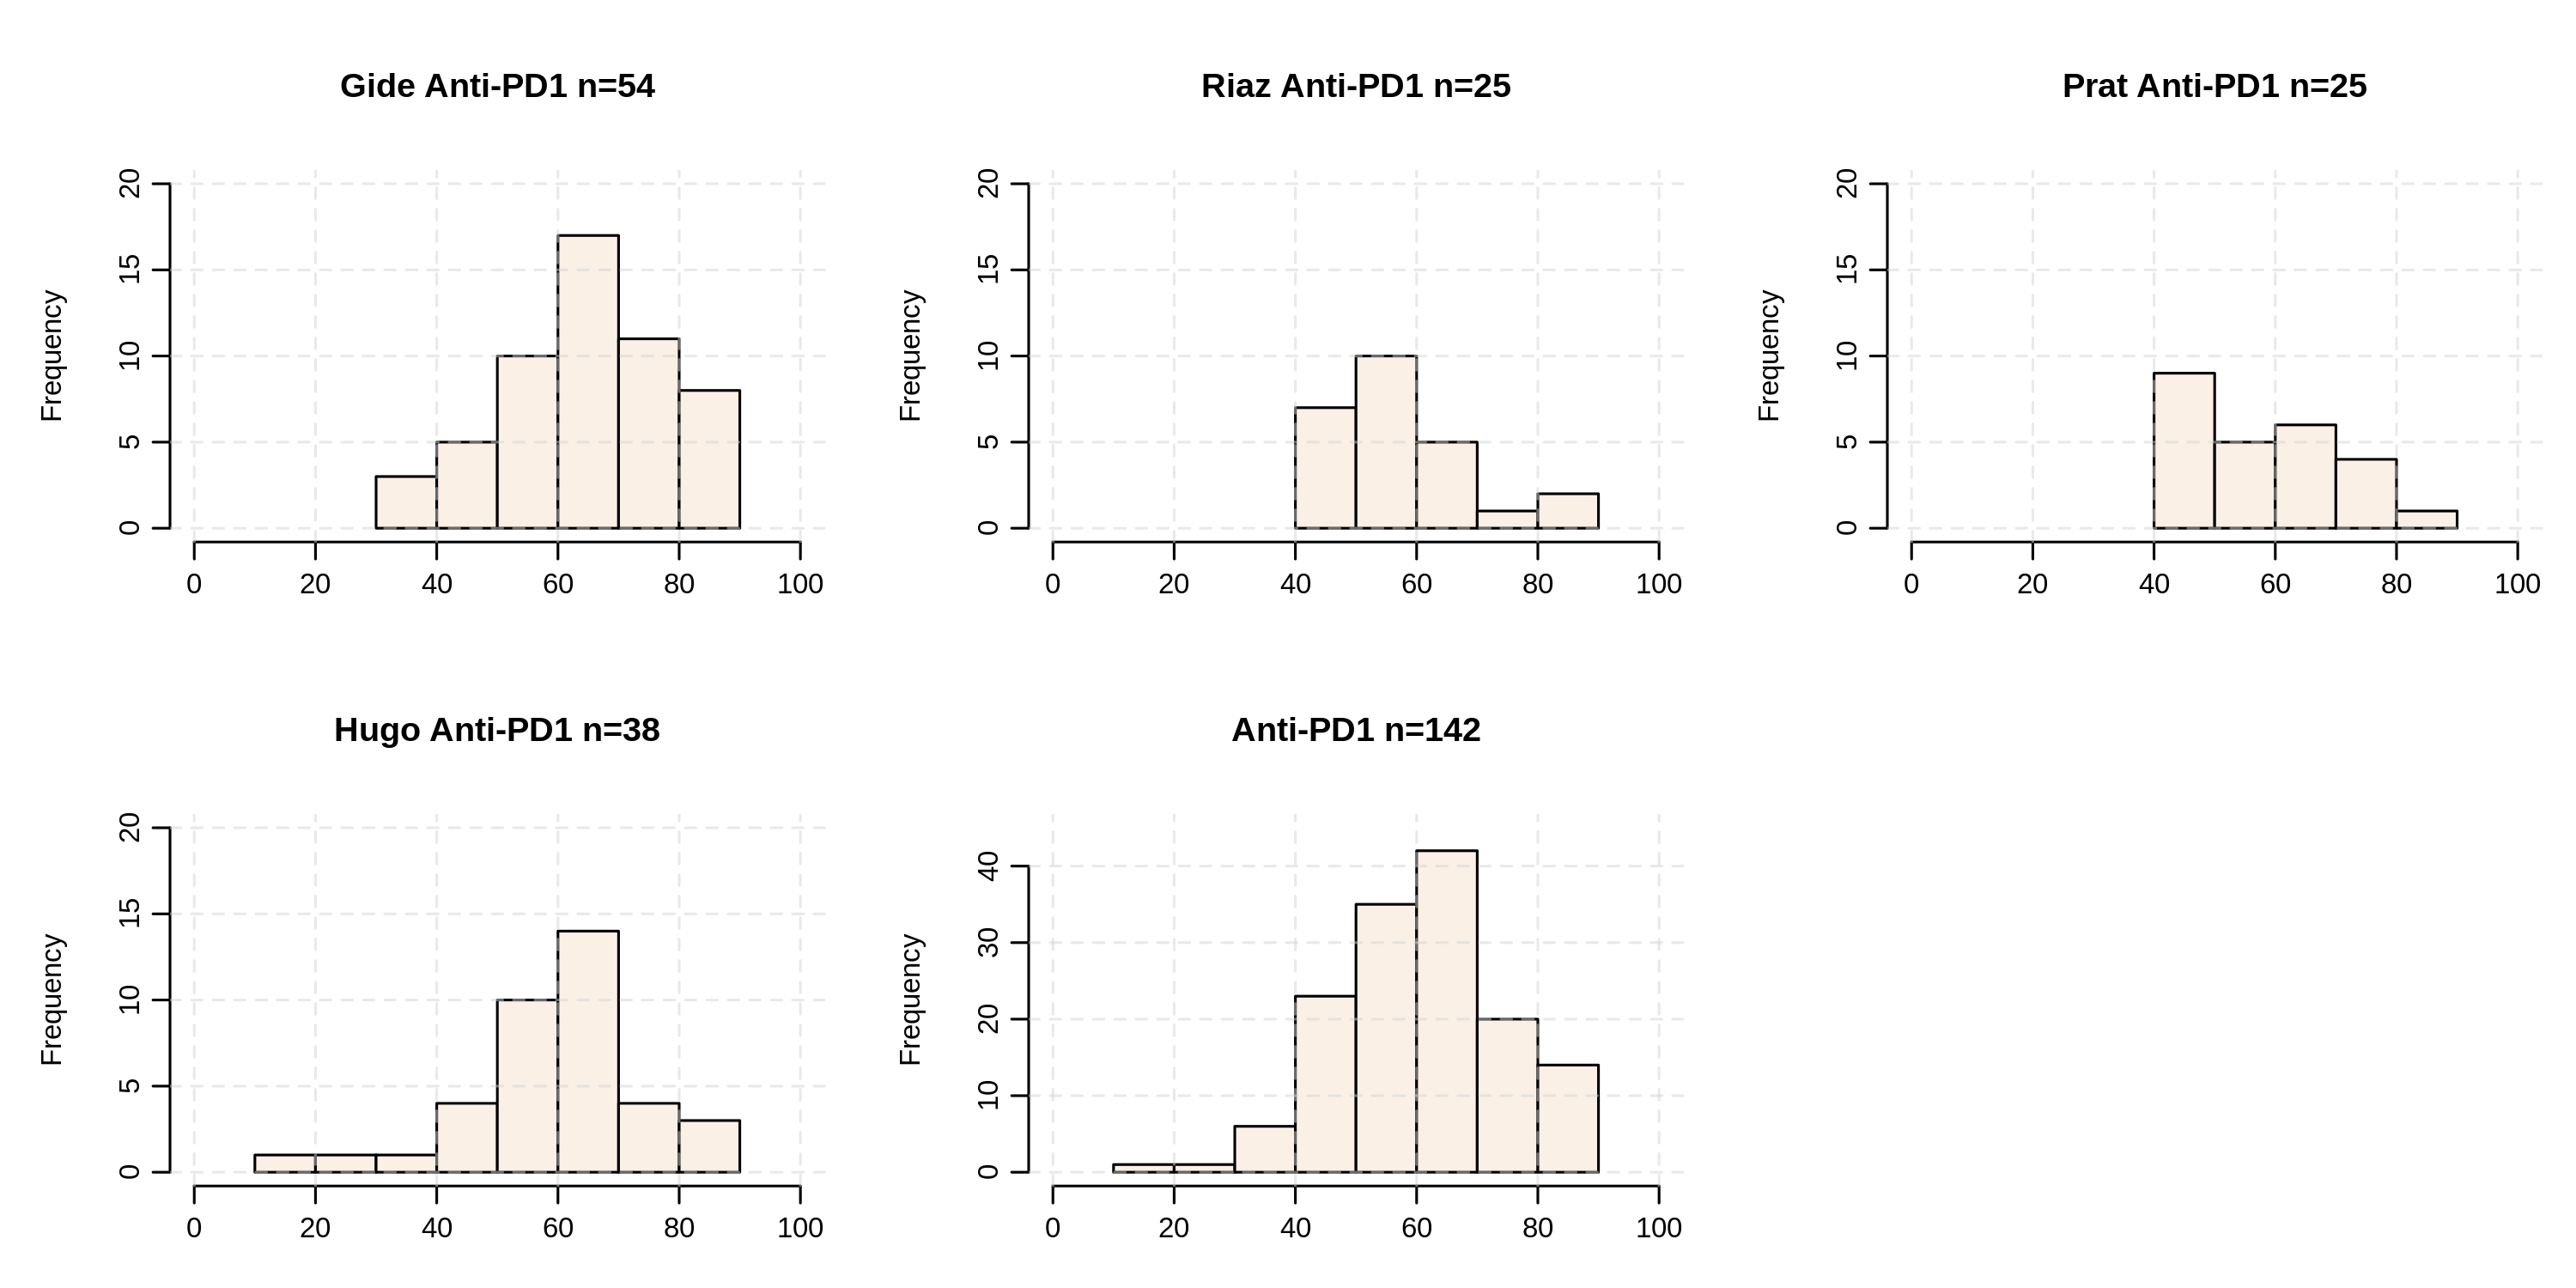

In [21]:
list_age <- list(prat_age=prat$Age,
                 gide_pn_age=gide_pn$Age,
#                  gide_pni_age=gide_pni$Age,
                 hugo_age=hugo$Age,
                 riaz_naive_age=riaz_naive$Age,
#                  riaz_prog_age=riaz_prog$Age,
                 antipd1_age=c(prat$Age, gide_pn$Age, hugo$Age, riaz_naive$Age),
                 antipd1_ctla4_age=c(gide_pni$Age, riaz_prog$Age)
                )
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 300)
par(mfrow=c(2,3), mar=c(3, 5, 5, 1), mgp=c(3, 0.7, 0))

ylimit <- c(0,20)
xlimit <- c(0, 100)

hist(list_age$gide_pn_age,
    main="Gide Anti-PD1 n=54",
    xlab="",
    col="linen",
    xlim=xlimit,
    ylim=ylimit
    )
grid(lty='dashed', col=alpha('lightgray',0.5))

# hist(list_age$gide_pni_age,
#     main="Gide Anti-PD1+Anti-CTLA4 n=51",
#     xlab="",
#     col="linen",
#     xlim=xlimit,
#     ylim=ylimit
#     )
# grid(lty='dashed', col=alpha('lightgray',0.5))

hist(list_age$riaz_naive_age,
    main="Riaz Anti-PD1 n=25",
    xlab="",
    col="linen",
    xlim=xlimit,
    ylim=ylimit
    )
grid(lty='dashed', col=alpha('lightgray',0.5))

hist(list_age$prat_age,
    main="Prat Anti-PD1 n=25",
    xlab="",
    col="linen",
    xlim=xlimit,
    ylim=ylimit
    )
grid(lty='dashed', col=alpha('lightgray',0.5))

# hist(list_age$riaz_prog_age,
#     main="Riaz Anti-PD1+Anti-CTLA4 n=26",
#     xlab="",
#     col="linen",
#     xlim=xlimit,
#     ylim=ylimit
#     )
# grid(lty='dashed', col=alpha('lightgray',0.5))

hist(list_age$hugo_age,
    main="Hugo Anti-PD1 n=38",
    xlab="",
    col="linen",
    xlim=xlimit,
    ylim=ylimit
    )
grid(lty='dashed', col=alpha('lightgray',0.5))

hist(list_age$antipd1_age,
    main="Anti-PD1 n=142",
    xlab="",
    col="linen",
    xlim=xlimit,
    ylim=c(0,45)
    )
grid(lty='dashed', col=alpha('lightgray',0.5))

# hist(list_age$antipd1_ctla4_age,
#     main="Anti-PD1+AntiCTLA4 n=77",
#     xlab="",
#     col="linen",
#     xlim=xlimit,
#     ylim=c(0,45)
#     )
# grid(lty='dashed', col=alpha('lightgray',0.5))


## Response Distribution

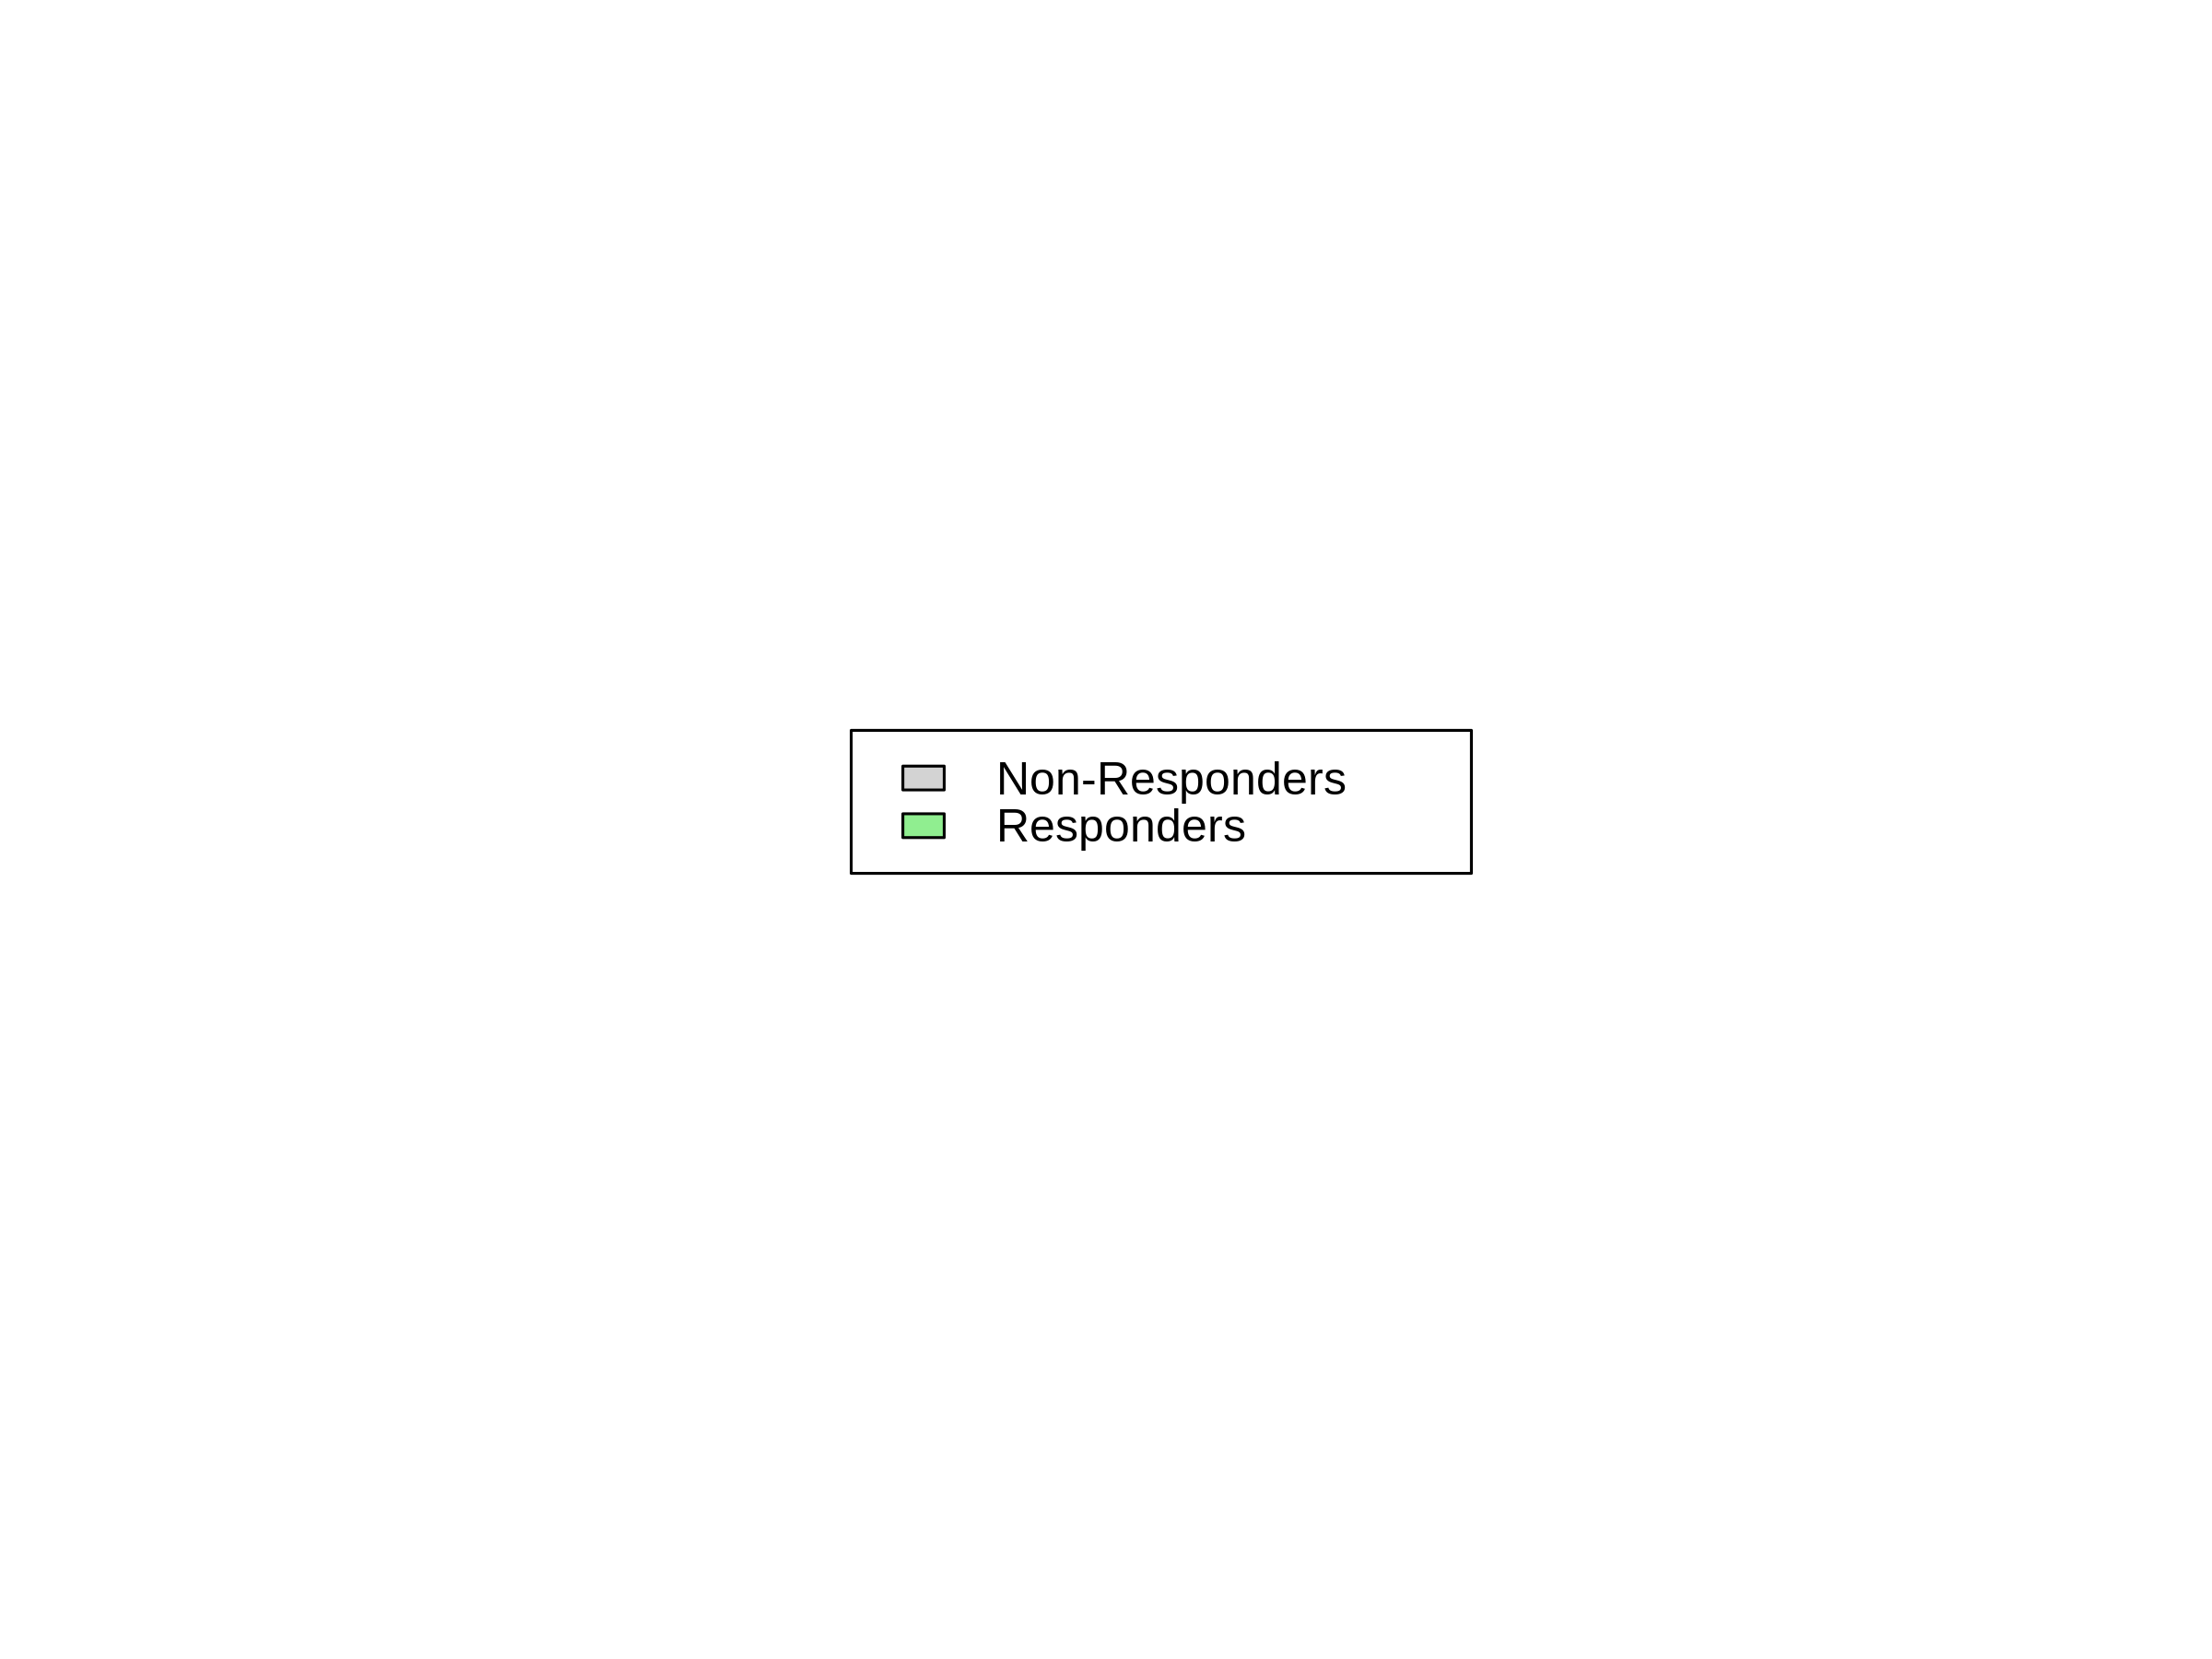

In [22]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 300)
plot(1,type="n",axes=F,xlab=NA,ylab=NA,xlim=c(1,100),ylim=c(1,100))
legend("center",
c("Non-Responders","Responders"),
fill = c("lightgray","lightgreen")
)

In [ ]:
# prop.table(table(c(
#                      liu$Response, amato$Response)))

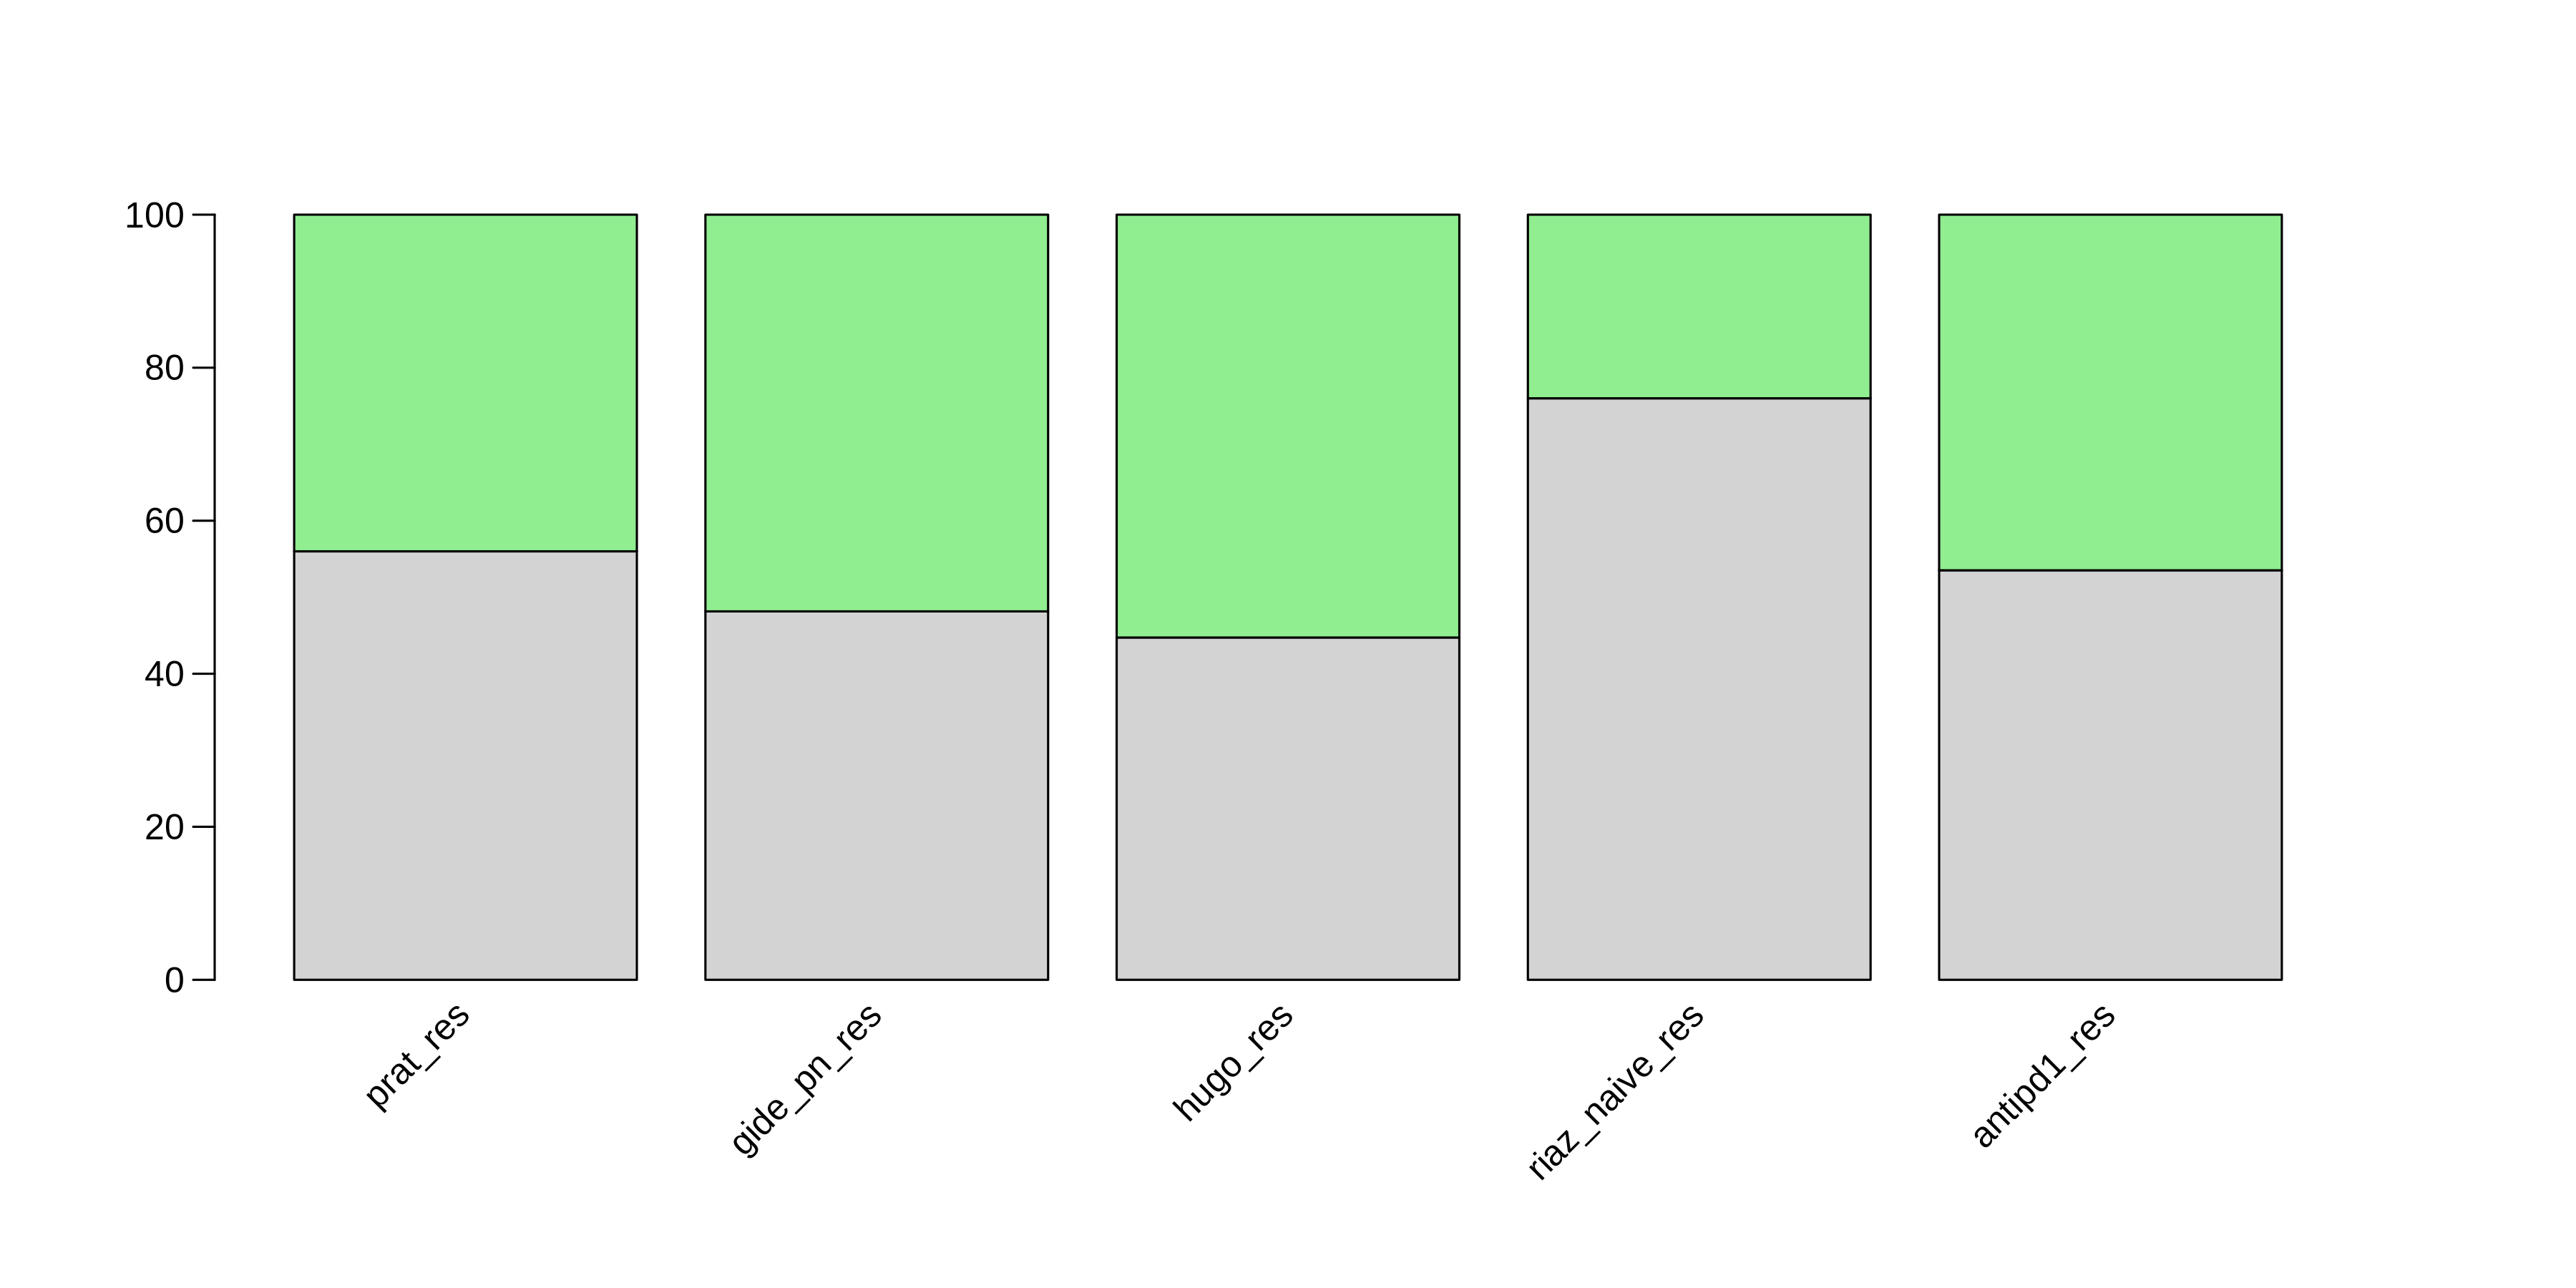

In [23]:
df_res <- data.frame(prat_res=as.numeric(prop.table(table(prat$Response))),
                       gide_pn_res=as.numeric(prop.table(table(gide_pn$Response))),
#                        gide_pni_res=as.numeric(prop.table(table(gide_pni$Response))),
                       hugo_res=as.numeric(prop.table(table(hugo$Response))),
                       riaz_naive_res=as.numeric(prop.table(table(riaz_naive$Response))),
#                        riaz_prog_res=as.numeric(prop.table(table(riaz_prog$Response))),
                       antipd1_res=as.numeric(prop.table(table(c(prat$Response, gide_pn$Response, 
                                                                 hugo$Response, riaz_naive$Response))))
#                        antipd1_LiuAmato_res=as.numeric(prop.table(table(c(prat$Response, gide_pn$Response, 
#                                                                  hugo$Response, riaz_naive$Response,
#                                                                  liu$Response, amato$Response)))),
#                        antipd1_ctla4_res=as.numeric(prop.table(table(c(gide_pni$Response, riaz_prog$Response))))
                      )*100
options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 300)
par(mar=c(7, 5, 5, 5), mgp=c(3, 0.7, 0))

x_res <- barplot(as.matrix(df_res),
             col=c("lightgray","lightgreen"),
             las=2,
             names=rep("", ncol(df_res))
            )
text(x_res, rep(-4,ncol(df_res)), colnames(df_res), xpd=NA, srt=45, adj=1)

In [24]:
# common <- Reduce(intersect, list(
#                                  names(prat),
#                                  names(gide_pn),
#                                  names(gide_pni),
#                                  names(hugo)
#                                  names(lauss), 
#                                  names(nathanson),
#                                  names(riaz_naive) 
#                                  names(riaz_prog)
#                                 )
#                 )
# length(common)
# common

In [25]:
# prop.table(table(final_table_clinical$Gender))
# prop.table(table(final_table_clinical$Age))

In [26]:
prop.table(table(gide_pn$Response))
prop.table(table(gide_pni$Response))
prop.table(table(hugo$Response))
prop.table(table(prat$Response))
prop.table(table(nathanson$Response))
prop.table(table(lauss$Response))
prop.table(table(riaz_naive$Response))
prop.table(table(riaz_prog$Response))


        0         1 
0.4814815 0.5185185 


        0         1 
0.3137255 0.6862745 


        0         1 
0.4473684 0.5526316 


   0    1 
0.56 0.44 


        0         1 
0.5555556 0.4444444 


        0         1 
0.5555556 0.4444444 


   0    1 
0.76 0.24 


        0         1 
0.8461538 0.1538462 

# Clean Data

In [27]:
# Check which column has > 50% NA values
countNA <- function(x=NULL,cutOff=NULL){
  output<-FALSE
  perc<-sum(is.na(x))*100/length(x)
  if(perc>cutOff){output<-TRUE}
  output  
}
col_nas <- apply(GideHugoRiaz_AntiPD1,2,function(x){countNA(x, 50)})
cat("Columns with NAs > 50% = ", sum(col_nas), "\n")
# all columns have <50% NAs

# Check which rows has > 50% NA values
row_nas <- apply(GideHugoRiaz_AntiPD1,1,function(x){countNA(x, 50)})
cat("Rows with NAs > 50% = ", sum(row_nas), "\n")

# 25 rows have >50% NAs, removing them
GideHugoRiaz_AntiPD1_filtered <- GideHugoRiaz_AntiPD1[-which(row_nas %in% TRUE),]

cat("Dimensions of the filtered dataset = ", dim(GideHugoRiaz_AntiPD1_filtered))

Columns with NAs > 50% =  0 
Rows with NAs > 50% =  25 
Dimensions of the filtered dataset =  92 16018

# Divide into test and train sets

In [28]:
train_pos <- createDataPartition(GideHugoRiaz_AntiPD1_filtered$Response, p = 0.8, list = F)
train <- GideHugoRiaz_AntiPD1_filtered[train_pos, ]
test <- GideHugoRiaz_AntiPD1_filtered[-train_pos, ]

nrow(train)
nrow(test)
nrow(GideHugoRiaz_AntiPD1_filtered)

saveRDS(train, 
        "/home/jp/ICP_Responders/DataCollectionFormatting/MergeTables/GideHugoRiaz_AntiPD1_train.rds")

saveRDS(test, 
        "/home/jp/ICP_Responders/DataCollectionFormatting/MergeTables/GideHugoRiaz_AntiPD1_test.rds")

[1] 74

[1] 18

[1] 92